Enter the number of cities: 5
Enter distance between city 1 and city 2: 41
Enter distance between city 1 and city 3: 12
Enter distance between city 1 and city 4: 32
Enter distance between city 1 and city 5: 65
Enter distance between city 2 and city 3: 11
Enter distance between city 2 and city 4: 22
Enter distance between city 2 and city 5: 12
Enter distance between city 3 and city 4: 43
Enter distance between city 3 and city 5: 5
Enter distance between city 4 and city 5: 66


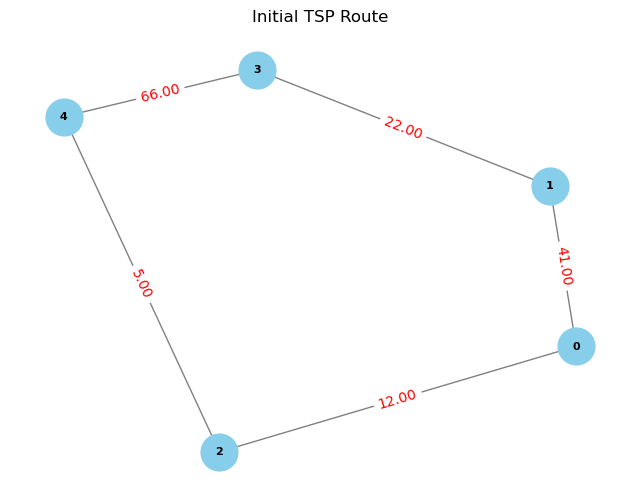

Initial TSP solution: [3 4 2 0 1]
Initial total distance: 146.0

After optimization:
Best TSP solution: [3 1 4 2 0]
Total distance after optimization: 83.0


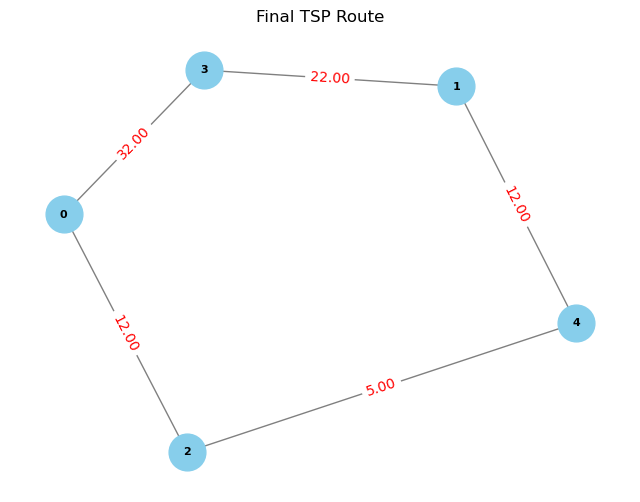

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def calculate_total_distance(solution, distance_matrix):
    total_distance = 0
    num_cities = len(solution)

    for i in range(num_cities - 1):
        total_distance += distance_matrix[solution[i]][solution[i + 1]]

    # Return to the starting city
    total_distance += distance_matrix[solution[-1]][solution[0]]

    return total_distance

def generate_initial_solution(num_cities):
    return np.random.permutation(num_cities)

def local_search(solution, distance_matrix):
    improved = True

    while improved:
        improved = False

        for i in range(1, len(solution) - 1):
            for j in range(i + 1, len(solution)):
                new_solution = np.copy(solution)
                new_solution[i:j + 1] = np.flip(solution[i:j + 1])

                new_distance = calculate_total_distance(new_solution, distance_matrix)
                current_distance = calculate_total_distance(solution, distance_matrix)

                if new_distance < current_distance:
                    solution = new_solution
                    improved = True

    return solution

def perturb(solution):
    # Perform a random perturbation by swapping two cities
    idx1, idx2 = np.random.choice(len(solution), size=2, replace=False)
    solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

def acceptance_criterion(perturbed_solution, current_solution, distance_matrix):
    # Simple acceptance criterion: always accept if the perturbed solution is better
    return calculate_total_distance(perturbed_solution, distance_matrix) < calculate_total_distance(current_solution, distance_matrix)

def plot_tsp_route_networkx(distance_matrix, route, title):
    num_cities = len(distance_matrix)
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(num_cities):
        G.add_node(i)

    # Add edges to the graph based on the TSP route
    for i in range(num_cities - 1):
        distance = distance_matrix[route[i]][route[i + 1]]
        G.add_edge(route[i], route[i + 1], weight=distance)
    distance = distance_matrix[route[-1]][route[0]]
    G.add_edge(route[-1], route[0], weight=distance)  # Connect the last city to the starting city

    # Draw the graph
    pos = {i: (i % 5, i // 5) for i in range(num_cities)}  # Assuming a grid layout for visualization

    # Explicitly create a new figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Use NetworkX spring_layout to layout the nodes
    pos = nx.spring_layout(G, seed=42)

    # Draw edges with uniform thickness
    nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, node_color='skyblue', font_color='black', font_weight='bold', ax=ax, edge_color='gray', edge_cmap=plt.cm.Blues)

    # Draw edge weights
    edge_labels = {(i, j): f"{distance_matrix[i][j]:.2f}" for i, j in G.edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(title)
    plt.show()

def user_input():
    num_cities = int(input("Enter the number of cities: "))
    
    # Get distances between each pair of cities
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            distance = float(input(f"Enter distance between city {i + 1} and city {j + 1}: "))
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
    
    return num_cities, distance_matrix

def iterated_local_search(distance_matrix, max_iterations=1000):
    num_cities = len(distance_matrix)
    current_solution = generate_initial_solution(num_cities)
    best_solution = np.copy(current_solution)

    for iteration in range(max_iterations):
        current_solution = local_search(current_solution, distance_matrix)
        perturbed_solution = perturb(np.copy(current_solution))

        if acceptance_criterion(perturbed_solution, current_solution, distance_matrix):
            current_solution = perturbed_solution

        if calculate_total_distance(current_solution, distance_matrix) < calculate_total_distance(best_solution, distance_matrix):
            best_solution = np.copy(current_solution)

    return best_solution

def main():
    num_cities, distance_matrix = user_input()

    # Plot initial TSP route
    initial_solution = generate_initial_solution(num_cities)
    plot_tsp_route_networkx(distance_matrix, initial_solution, "Initial TSP Route")

    # Calculate and print initial distance
    initial_distance = calculate_total_distance(initial_solution, distance_matrix)
    print("Initial TSP solution:", initial_solution)
    print("Initial total distance:", initial_distance)

    # Run Iterated Local Search
    best_solution = iterated_local_search(distance_matrix)
    print("\nAfter optimization:")
    print("Best TSP solution:", best_solution)
    
    # Calculate and print final distance
    final_distance = calculate_total_distance(best_solution, distance_matrix)
    print("Total distance after optimization:", final_distance)

    # Plot final TSP route using networkx
    plot_tsp_route_networkx(distance_matrix, best_solution, "Final TSP Route")

if __name__ == "__main__":
    main()
